In [1]:
#NOMS :  Yanis YAHI
#        Mohamed amine ZEMALI
#        Yannick D'ALMEIDA
#        Bastien REPAIRE
#Professeur de soutenance : Nathan SOLAL

In [2]:
import numpy as np
import pandas as pnd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import math as mt
import seaborn as sn
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [3]:
# Notes : 
# - les 18 types sont utilisés dans "combats.csv"
# - 784 Pokémons sont utilisés dans "combats.csv" pour 800 pokémons dans "pokemon.csv"

In [4]:
# Lecture des fichiers
combats_data = pnd.read_csv("combats.csv")
pokedex_data = pnd.read_csv("pokemon.csv")
tests_file_data = pnd.read_csv("tests.csv")

In [5]:
# Sort l'id de tous les pokémons du pokedex
def getAllIdPokemons():
    all_pokemons_ids = []
    for item in pokedex_data.iloc[:,0]:
        all_pokemons_ids.append(item)
    return all_pokemons_ids
all_pokemon_ids = getAllIdPokemons()

In [6]:
# Vérifie si il y a un doublon de "num" dans un array
def checkDoublon(num, array):
    for item in array:
        if (item == num):
            return True
    return False

In [7]:
# Sort les id des pokémons utilisés dans les combats du fichier "combats.csv"
def getUsedPokemons():
    pokemons = []
    for number in combats_data["First_pokemon"]:
        if(not checkDoublon(number,pokemons)):
            pokemons.append(number)
    for second in combats_data["Second_pokemon"]:
        if(not checkDoublon(second,pokemons)):
            pokemons.append(second)
    return pokemons
used_pokemons_id_array = getUsedPokemons()

In [8]:
# Sort les noms des pokémons inutilisés dans les combats du fichier "combats.csv"
def getUnusedPokemons():
    res = []
    for pokemon_id in all_pokemon_ids:
        if pokemon_id not in used_pokemons_id_array:
            res.append(pokedex_data.loc[pokedex_data["#"] == pokemon_id, "Name"].iloc[0])
    return res
unused_pokemons_name_array = getUnusedPokemons()

In [9]:
#Check le nombres de combats en commun dans combats.csv avec tests.csv
def commonPokemons():
    cpt = 0
    for index, row in combats_data.iterrows():
        match = ((tests_file_data["First_pokemon"] == row["First_pokemon"]) & (tests_file_data["Second_pokemon"] == row["Second_pokemon"])) | ((tests_file_data["First_pokemon"] == row["Second_pokemon"]) & (tests_file_data["Second_pokemon"] == row["First_pokemon"]))
        cpt += sum(match)
    return cpt
common_battles = commonPokemons()

In [10]:
# Retourne tous les types des pokémons du pokedex
def getAllTypes():
    unique_types = []
    for poketype in pokedex_data["Type 1"]:
        if(not checkDoublon(poketype, unique_types)):
            unique_types.append(poketype)
    return unique_types
all_types_of_pokemons_array = getAllTypes()

In [11]:
# Retourne les types utilisés dans le fichier "combats.csv"
def getAllTypesOfCombatsFile():
    poke_types_array = []
    for poke_num in used_pokemons_id_array :
        if(not checkDoublon(pokedex_data.loc[pokedex_data["#"] == poke_num,"Type 1"].iloc[0],poke_types_array)):
            poke_types_array.append(pokedex_data.loc[pokedex_data["#"] == poke_num,"Type 1"].iloc[0])
    return poke_types_array
types_of_combats_file_array = getAllTypesOfCombatsFile()

In [12]:
# Sort tous les pokemons de tous les combats dans une liste
def getNumberOfCombatsOfPokemon(pokemon_id):
    res = 0
    for pokemon in combats_data['First_pokemon']:
        if(pokemon_id == pokemon):
            res+=1
    for pokemon in combats_data['Second_pokemon']:
        if(pokemon_id == pokemon):
            res+=1
    return res

In [13]:
#Sort les id des pokémons avec leurs nombre de combats
def getPokemonsWithCombatsNumber() :
    pokemons_and_combats_number = {}
    for pokemon in used_pokemons_id_array :
        pokemons_and_combats_number[pokemon] = getNumberOfCombatsOfPokemon(pokemon)
    return pokemons_and_combats_number

pokemons_and_combats_number = getPokemonsWithCombatsNumber()

In [14]:
# Nombres de pokémons par type
rock = rock=grass=fairy=fire=bug=psychic=fighting=water=normal=ground=electric=dark=ice=dragon=steel=ghost=flying=poison=0

for poke_num in used_pokemons_id_array:
    poke_type1 = pokedex_data.loc[(pokedex_data["#"] == poke_num,"Type 1")].iloc[0]
    poke_type2 = pokedex_data.loc[(pokedex_data["#"] == poke_num,"Type 2")].iloc[0]
    if(poke_type1 == 'Rock' or poke_type2 == 'Rock'):
        rock += 1
    if(poke_type1 == 'Grass' or poke_type2 == 'Grass'):
        grass += 1
    if(poke_type1 == 'Fairy' or poke_type2 == 'Fairy'):
        fairy += 1
    if(poke_type1 == 'Fire' or poke_type2 == 'Fire'):
        fire += 1
    if(poke_type1 == 'Bug' or poke_type2 == 'Bug'):
        bug += 1
    if(poke_type1 == 'Psychic' or poke_type2 == 'Psychic'):
        psychic +=1
    if(poke_type1 == 'Fighting' or poke_type2 == 'Fighting'):
        fighting += 1
    if(poke_type1 == 'Water' or poke_type2 == 'Water'):
        water += 1
    if(poke_type1 == 'Normal' or poke_type2 == 'Normal'):
        normal += 1
    if(poke_type1 == 'Ground' or poke_type2 == 'Ground'):
        ground += 1
    if(poke_type1 == 'Electric' or poke_type2 == 'Electric'):
        electric += 1
    if(poke_type1 == 'Dark' or poke_type2 == 'Dark'):
        dark += 1
    if(poke_type1 == 'Ice' or poke_type2 == 'Ice'):
        ice += 1
    if(poke_type1 == 'Dragon' or poke_type2 == 'Dragon'):
        dragon += 1
    if(poke_type1 == 'Steel' or poke_type2 == 'Steel'):
        steel += 1
    if(poke_type1 == 'Ghost' or poke_type2 == 'Ghost'):
        ghost += 1
    if(poke_type1 == 'Flying' or poke_type2 == 'Flying'):
        flying += 1
    if(poke_type1 == 'Poison' or poke_type2 == 'Poison'):
        poison += 1
        number_pokemons_by_type_array = [rock, grass, fairy, fire, bug, psychic, fighting, water, normal, ground, electric, dark, ice, dragon, steel, ghost, flying, poison]

Notes sur le dataset de base : 
 - Nombre de combats ->  50000 
 - Nombre de pokémons dans le pokédex -> 800
 - Nombre de pokémons utilisés ->  784
 - Nombre de pokémons inutilisés ->  16
 - Nombre de types utilisés -> 18 (tous les types sont utilisés)

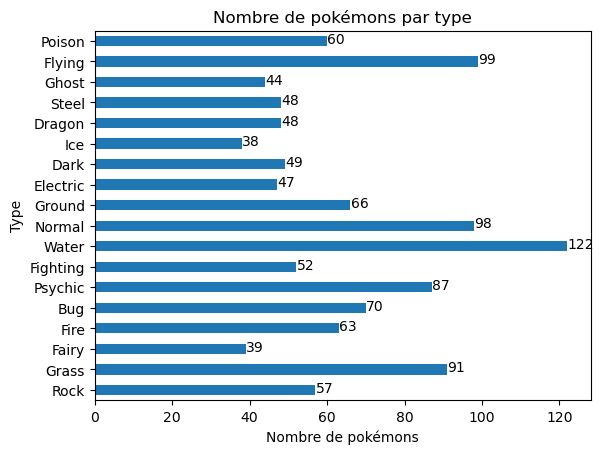

In [15]:
# Affiche le graphe en mettant les nombres de pokémons par type aussi juste a côté des barres
data = pnd.DataFrame({'Type': types_of_combats_file_array, 'Nombre de pokémons': number_pokemons_by_type_array})
df = pnd.DataFrame(data)
ax = df.plot.barh(x='Type', y='Nombre de pokémons', legend=False)
plt.xlabel('Nombre de pokémons')
plt.title('Nombre de pokémons par type')
i = -0.1
for it in number_pokemons_by_type_array :
    ax.annotate(str(it), (it+0.1, i))
    i+=1
plt.show()

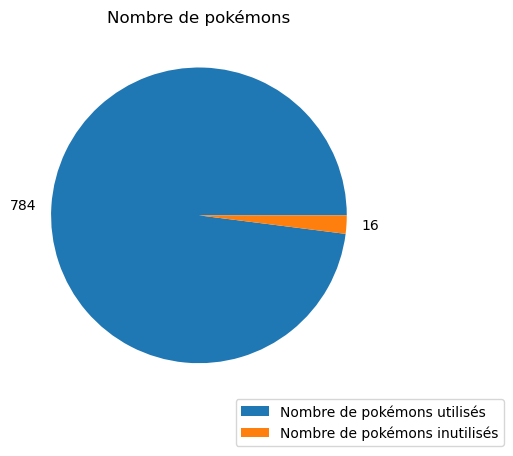

In [16]:
# Affiche le graphe avec le nombre de pokémons
y = [len(used_pokemons_id_array),len(unused_pokemons_name_array)]

plt.pie(y,labels=y)
plt.legend(['Nombre de pokémons utilisés','Nombre de pokémons inutilisés'],bbox_to_anchor=(1,0), loc="lower right", bbox_transform=plt.gcf().transFigure)
plt.title('Nombre de pokémons')
plt.show()

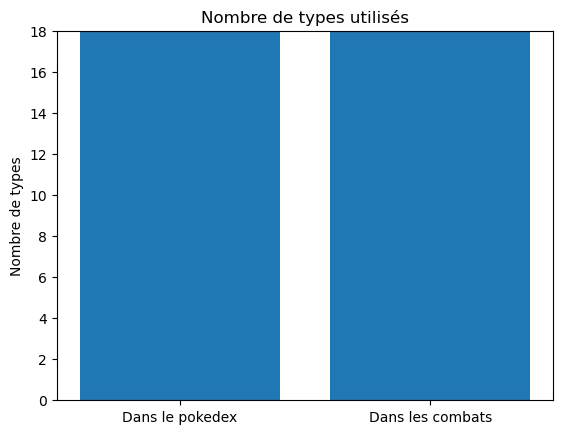

In [17]:
# Affiche l'équivalence du nombre de types utilisés dans les combats et présents dans le pokédex
types = ['Dans le pokedex', 'Dans les combats']
count = [len(all_types_of_pokemons_array),len(types_of_combats_file_array)]
plt.bar(types, count)
plt.ylabel('Nombre de types')
plt.title('Nombre de types utilisés')
plt.ylim(0, 18)
plt.show()

**Tous les types sont utilisés**

In [18]:
# Création d'un dictionnaire avec tous les pokémons qui combattent et leurs pourcentage de réussite au combat
combats_winners = combats_data['Winner'].tolist()
winners_percentage_dict = {}
for winner in combats_winners:
    winners_percentage_dict[winner] = combats_winners.count(winner)*100/pokemons_and_combats_number[winner]

In [19]:
# Tri du dictionnaire pour faicilier l'accès au données, on prend les 20 derniers pokemons vu que c'est les plus forts
# et on les stocke dans deux listes
sorted_winners = sorted(winners_percentage_dict.items(), key=lambda x:x[1])
victorious_pokemons_pairs = sorted_winners[-20:]
victorious_pokemons_ids = []
pokemons_win_percentage = []
for pok in victorious_pokemons_pairs:
    victorious_pokemons_ids.append(pok[0])
    pokemons_win_percentage.append(pok[1])

In [20]:
# Récupèration des noms des pokémons pour une meilleure représentation visuelle
victorious_pokemons_names = []
for pokemon in victorious_pokemons_ids:
    victorious_pokemons_names.append(pokedex_data.loc[(pokedex_data["#"] == pokemon,'Name')].iloc[0])

<function matplotlib.pyplot.show(close=None, block=None)>

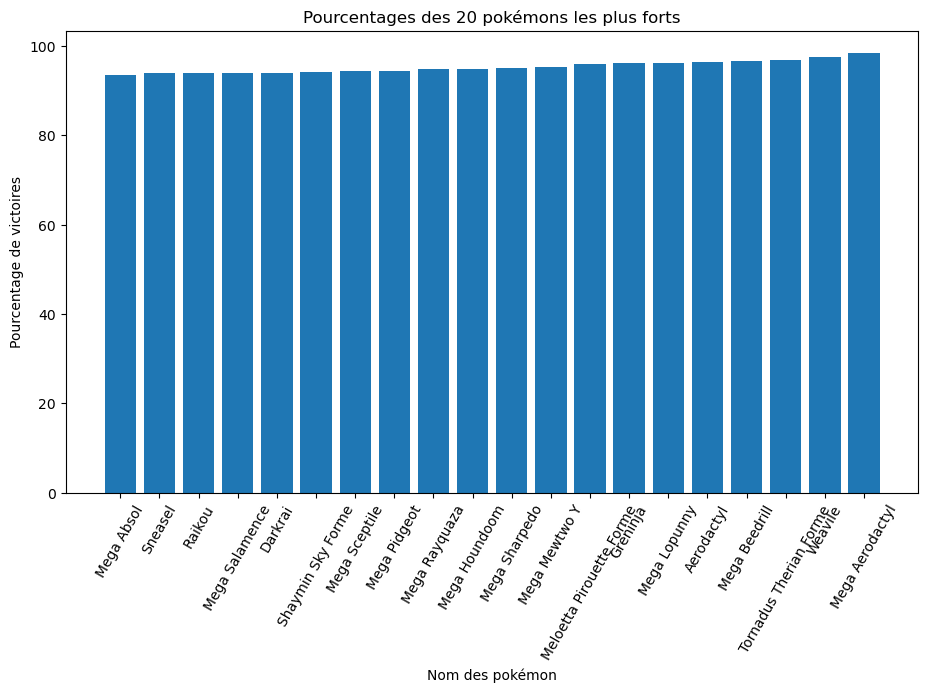

In [21]:
# Affichage du graphe
plt.figure(figsize=(11,6))
plt.bar(victorious_pokemons_names,pokemons_win_percentage)
plt.ylabel('Pourcentage de victoires')
plt.xlabel('Nom des pokémon')
plt.title('Pourcentages des 20 pokémons les plus forts')
plt.xticks(rotation=60)
plt.show

On voit bien que les pokémons légendaires et/ou en forme MEGA ont un pourcentage de victoire très haut (proche de 100%).
Ceci n'est pas étonnant car si on vérifie leurs statistiques de base (niveau 50) celles-ci sont les plus élevées du jeu, en plus d'avoir de meilleurs attaques et des types avantageux (Raiku n'a qu'une faiblesse -> type sol)

In [22]:
# Stockage des 20 premiers pokémons car c'est les plus faibles
losers_pokemons_pairs = sorted_winners[:20]
losers_pokemons_ids = []
losers_pokemons_win_percentage = []
for pok in losers_pokemons_pairs:
    losers_pokemons_ids.append(pok[0])
    losers_pokemons_win_percentage.append(pok[1])

In [23]:
# Récupèration des noms des pokémons pour une meilleure représentation visuelle
losers_pokemons_names = []
for pokemon in losers_pokemons_ids:
    losers_pokemons_names.append(pokedex_data.loc[(pokedex_data["#"] == pokemon,'Name')].iloc[0])

<function matplotlib.pyplot.show(close=None, block=None)>

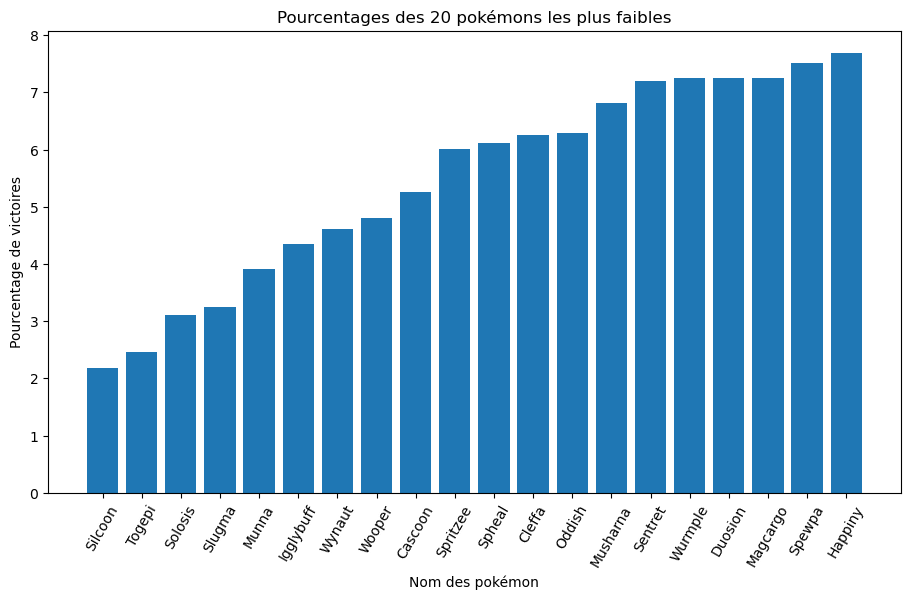

In [24]:
# Affichage du graphe
plt.figure(figsize=(11,6))
plt.bar(losers_pokemons_names,losers_pokemons_win_percentage)
plt.ylabel('Pourcentage de victoires')
plt.xlabel('Nom des pokémon')
plt.title('Pourcentages des 20 pokémons les plus faibles')
plt.xticks(rotation=60)
plt.show

Problèmes avec 'tests.csv' : 
Nous n'avons pas pu utiliser 'tests.csv' à son plein potentiel car : 
 - Les combats n'ont pas de gagnant, donc impossible de vérifier si nos prédictions sont bonnes
 - Les seuls combats que nous pouvons évaluer sont déjà dans le fichier 'combats.csv', donc évaluer ces combats n'a pas de sens 

Nombre de combats communs avec 'combats.csv' :  1602

‎ 

‎ 

**On commence la Data Science Dure**

‎ 

‎ 

In [25]:
def creation_donnes_pour_entrainement(pokemon_data, combat_data):
    # Fusionner les informations des Pokémon avec les données des combats
    combat_data = combat_data.merge(pokemon_data, left_on='First_pokemon', right_on='#')
    combat_data = combat_data.merge(pokemon_data, left_on='Second_pokemon', right_on='#', suffixes=('_first', '_second'))

    # Créer les variables X et y pour la classification
    X = combat_data.drop(columns=['Winner'])
    y = (combat_data['Winner'] != combat_data['First_pokemon']).astype(int)

    # Créer les colonnes "One-Hot" pour les types de Pokémon
    type1_first_one_hot = pnd.get_dummies(combat_data['Type 1_first'], prefix='Type1_first')
    type2_first_one_hot = pnd.get_dummies(combat_data['Type 2_first'], prefix='Type2_first')
    type1_second_one_hot = pnd.get_dummies(combat_data['Type 1_second'], prefix='Type1_second')
    type2_second_one_hot = pnd.get_dummies(combat_data['Type 2_second'], prefix='Type2_second')

    # Ajouter les colonnes "One-Hot" pour les types de Pokémon
    X = pnd.concat([X, type1_first_one_hot, type2_first_one_hot, type1_second_one_hot, type2_second_one_hot], axis=1)

    # Supprimer les colonnes non numériques
    columns_to_drop = ['Name_first', 'Type 1_first', 'Type 2_first', 'Generation_first', 'Legendary_first', 'Name_second', 'Type 1_second', 'Type 2_second', 'Generation_second', 'Legendary_second']
    X = X.drop(columns=columns_to_drop)

    return X, y


X, y = creation_donnes_pour_entrainement(pokedex, training)

NameError: name 'pokedex' is not defined

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

En examinant les données fournies, on peut voir que les caractéristiques des Pokémon (HP, Attack, Defense, Sp. Atk, Sp. Def, et Speed) ont des plages de valeurs très différentes comme on peut le voir plus haut dans l'affichage du dataset. Dans ce cas, nous normalisons les données pour garantir que toutes les caractéristiques sont mises à l'échelle  de manière uniforme et qu'aucune d'entre elles n'influence de manière disproportionnée l'apprentissage de notre modèle.

La normalisation des données avec StandardScaler transforme les données pour que chaque caractéristique ait une moyenne de 0 et un écart type de 1. 

In [ ]:
# Entrainement et évaluation du modèle Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_scaled, y_train)
y_pred = decision_tree.predict(X_test_scaled)
accuracy_tree = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy_tree:.4f}")

# Entrainement et évaluation du modèle Random Forest
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_scaled, y_train)
y_pred = random_forest.predict(X_test_scaled)
accuracy_random = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy_random:.4f}")

# Entrainement et évaluation du modèle Regression
logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train_scaled, y_train)
y_pred = logistic_regression.predict(X_test_scaled)
accuracy_linear = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy_linear:.4f}")

models = ['Decision Tree', 'Random Forest', 'Logistic Regression']
accuracies = [accuracy_tree, accuracy_random, accuracy_linear]

# Créer un graphique à barres
fig, ax = plt.subplots()
bar_positions = np.arange(len(models))
ax.bar(bar_positions, accuracies, align='center')

# Configurer les étiquettes et les titres
ax.set_xticks(bar_positions)
ax.set_xticklabels(models)
ax.set_xlabel('Modèles')
ax.set_ylabel('Précision')
ax.set_title('Comparaison des précisions des modèles')

# Afficher le graphique
plt.show()

On divise le data_set en un ensemble test et un ensemble train, on fixe la taille du test à 0.2, et par conséquence celle du train à 0.8. Ces valeurs pourraient changer selon les résultats du modèles, mais elles paraissent déjà raisonnables.

Pour notre projet, nous comptons utiliser le DecisionTree.

Un arbre de décision est une méthode d'apprentissage automatique qui apprend à partir des données en posant une série de questions sur les caractéristiques de ces données. En posant ces questions, l'algorithme crée une structure en forme d'arbre, où chaque nœud représente une question et chaque branche représente une réponse possible. Les feuilles de l'arbre représentent les prédictions finales pour la classification ou la régression.

Dans notre projet, un arbre de décision est adapté car il peut gérer les différentes caractéristiques des Pokémon et leurs combinaisons pour prédire le vainqueur d'un combat. De plus, les arbres de décision sont faciles à interpréter et à visualiser, ce qui est utile pour comprendre l'importance des différentes caractéristiques dans les prédictions.

In [ ]:
#On commence à toucher aux hyperparamètres
model = DecisionTreeClassifier(max_depth=30, random_state=42,min_samples_split = 10)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

# Créer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Créer un DataFrame à partir de la matrice de confusion pour une meilleure visualisation
cm_df = pnd.DataFrame(cm, columns=['Prédit 0', 'Prédit 1'], index=['Vrai 0', 'Vrai 1'])

# Visualiser la matrice de confusion
plt.figure(figsize=(7, 5))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.title('Matrice de confusion')
plt.xlabel('Valeur prédite')
plt.ylabel('Valeur réelle')

plt.show()

Notre modèle prédit avec une exactitude de 95% le bon gagnant. Cela paraît énorme, même si nous avons déjà joué sur l'hyperparamètre de max_depth en le fixant à 30 et min_samples_split à 10 pour éviter le surraprentissage au maximum, on pourrait se demander si ce score n'est pas anormalement élevé. Pour vérifier cela nous avons plusieurs solutions que nous allons mettre en place:

Premièrement, tester avec un modele moins sujet au surapprentissage, nous pensons utiliser RandomForestClassifier(),qui est moins sujet au surapprentissage car il construit de nombreux arbres de décision indépendants et combine leurs prédictions.

Si RandomForestClassifier() nous donne une prédiction non loin de celle-ci, nous allons alors effectuer un cross validation score, sur plusieurs plis, 5 voire 10, et mesurer la moyenne de ces scores.

Si ces scores ne sont pas loins de la prédiciton de notre modèle, nous pourront conclure que non, notre modèle n'a pas surrappris/overfit.

De plus, nous pourrons par la suite essayer la PCA, qui pourrait peut-être augmenter le score de notre modele, même si 95% nous paraît très élevé.

Notre matrice de confusion montre bien l'efficatié de de notre modèle, en effet il prédit à 223 vrai le bon gagnant si c'est le premier pokémon, et 263 près si c'est le deuxieme Pokémon.


In [ ]:
precision = 4540/(4540+223)
print(precision)

In [ ]:
# Lecture des fichiers CSV
pokemon_df = pnd.read_csv('pokemon.csv')

modelRandom =  RandomForestClassifier(random_state = 42)
modelRandom.fit(X_train_scaled, y_train)
y_pred_random = modelRandom.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_random)
print(accuracy)

RandomForest qui comme dit précédemment est moins sujet à l'overfit, nous donne un score de 93.94%, soit environs 1% de moins que DecisionTreeClassifier, en prenant en compte le fait que nous avons utilisé et adapté des hyperparamètres, nous pouvons avancé avec une première preuve que non notre modele n'a pas surrapris/overfit, et qu'il a juste bien prédit les résultats.

Cependant nous ne nous arrêtons pas là, puisque nous allons le vérifier avec la cross validation.

On peut ajouter qu'avec un score aussi élevé, RandomForestClassifier aurait pû être utilisé dans ce projet, mais DecisionTree nous fournit de meilleur résultat. Tout en restant objectif, RandomForestClassifier aurait peut-être pu donner de meilleur résultats en jouant sur les hyperparamètres(même si c'est l'un des classifier avec le moins d'hyperparamètres) n_estimators, max_features et random_state.

In [ ]:
cv_scores_max_depth = cross_val_score(model, X, y, cv=10)
mean_cv_score_max_depth = np.mean(cv_scores_max_depth)
print(f"La moyenne des scores de validation croisée est : {mean_cv_score_max_depth:.4f}")

In [ ]:
cv_scores_max_depth = cross_val_score(modelRandom, X, y, cv=10)
mean_cv_score_max_depth = np.mean(cv_scores_max_depth)
print(f"La moyenne des scores de validation croisée est : {mean_cv_score_max_depth:.4f}")

In [ ]:
cv_scores_max_depth = cross_val_score(model, X, y, cv=20)
mean_cv_score_max_depth = np.mean(cv_scores_max_depth)
print(f"La moyenne des scores de validation croisée est : {mean_cv_score_max_depth:.4f}")

# Créer le graphique à barres
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(cv_scores_max_depth) + 1), cv_scores_max_depth)
plt.xlabel('Fold')
plt.ylabel('Score de validation croisée')
plt.title('Scores de validation croisée pour chaque fold avec DecisionTree')
plt.xticks(range(1, len(cv_scores_max_depth) + 1))

# Ajouter la ligne de la moyenne des scores
plt.axhline(y=mean_cv_score_max_depth, color='r', linestyle='--', label=f"Moyenne: {mean_cv_score_max_depth:.4f}")
plt.legend()

plt.show()

Pourquoi nous utilisons le cross validation score :
On veut estimer la manière dont notre modèle généralise sur de nouvelles données en évitant le surapprentissage.Pour se faire, on divise le jeu de données en un certain nombre de sous-ensembles qu'on appelle plis/folds de manières random. 
Le modèle s'entraine ensuite sur chaque itération, a chaque itération il se test sur ce pli et s'entraine sur les autres plis.
Ce score moyen offre une estimation plus fiable de la performance du modèle sur de nouvelles données, car il tient compte de la variabilité des performances du modèle sur différents ensembles d'entraînement et de validation.

On peut observer ici sur la moyenne des score de cross validation que notre modèle est très précis en générale, avec une très bonne moyenne de 93.26%. Pour rappel, notre predict accuracy était de 95.14%, or il n'y a que une différence de 1.5%, nous pourrions dire que notre modele a très LEGEREMENT overfit, mais honnêtemenent sur 1.5% cela nous paraît presque négligeable.
Le surapprentissage se produit généralement lorsque l'écart entre les performances sur les données d'entraînement et les performances sur les données de validation/test est grand, ici ce n'est pas le cas.
De plus, la moyenne de cross validation score de Random Forest est de 91.9%, ce qui montre que lui aussi n'a pas surapris.

In [ ]:
# Normaliser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Appliquer la PCA
pca = PCA(n_components=0.95)  # Ici, nous choisissons de conserver 95% de la variance totale
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Entraîner le modèle sans PCA
model = DecisionTreeClassifier(max_depth=30, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy sans PCA:", accuracy)

# Entraîner le modèle avec PCA
model_pca = DecisionTreeClassifier(random_state=42)
model_pca.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print("Accuracy avec PCA:", accuracy_pca)

In [ ]:
# Les données à afficher
labels = ['Sans PCA', 'Avec PCA']
accuracies = [accuracy, accuracy_pca]

# Créer le graphique à barres
fig, ax = plt.subplots()
ax.bar(labels, accuracies)

# Ajouter des étiquettes et un titre
ax.set_ylabel('Accuracy')
ax.set_title('Comparaison de l accuracy pour un meme modele')

# Afficher le graphique
plt.show()

L'utilisation de la PCA est faite pour réduire le nombre de variable tout en conservant la majeure partie des informations contenues dans les données. Dans notre cas on a transformé les variables d'origines en de nouvelles variables que l'on appelle X_train_PCA et X_test_PCA. 
La PCA peut améliorer les résultats de modeles et/ou éviter l'overfit, mais dans notre cas cela les dégrade. On peut en conclure que notre modele a besoin de toutes les variables que on lui donne.
On passe de 95% de accuracy à moins de 80%.



                                                        Conclusion

    Nous avons mené à bien notre mission, entraîner un modèle à la prediction du vainqueur entre 2 pokémon lors d'un combat, nettoyer des données et les standardiser, comprendre un modèle (ici le DecisionTree), le comparer à d'autre(s) et l'ajuster pour maximiser les résultats. De plus nous avons tenté de mettre en place une PCA, certe elle a échouée, car ici toutes les caractéristiques sont importantes. 
    Objectivement, le jeu de donnée ne nous a pas donné de fil à retordre, le DecisionTree obtient déjà un score de 94% sans hyperparamètres, mais il fut intéressant de comprendre et utiliser ceux-ci. Le projet nous a plu, nous aimons Pokémon et faire de la data science à travers un projet sur ce thème nous a mieux faire comprendre ce domaine.
    Quelques critiques, le combats.csv pourrait être plus grand, surtout pour un thème limité comme les combats Pokémon, on voit par exemple que Tortank/Blastoise n'a pas combattu, nous n'avons que 1/12 des combats possibles. En addition à cela, le modèle est à prendre avec des pincettes, en effet nous n'avons pas la prétention de dire que notre modèle peut réellement prédire à 95% un victorieux, car nous ne savons pas dans quelles conditions se sont fait les combats (Si les joueurs ont utilisés leur meilleures capacités, si il y a eu des coups critiques, si des effets de status ont été appliqué et combien de combat ont été fait pour déterminer le gagnant).
    Nous avons au final obtenu un score de 95.2% en jouant sur 2 hyperparamètres, max_depth et min_samples-split, nous ne pensons pas pouvoir aller au dela, et cela nous semble déjà élevé, on a même soupçonné un overfitting.
    